In [1]:
from Code import utilities as ut
from Code import cGAN as model
import numpy as np

Using TensorFlow backend.


In [2]:
data = np.load('train_set_marm_100-30.npy')

In [3]:
focused, defocused = ut.dataProcess(data)

input_real shape:  (1800, 64, 64, 1)
input_cond shape:  (1800, 64, 64, 1)


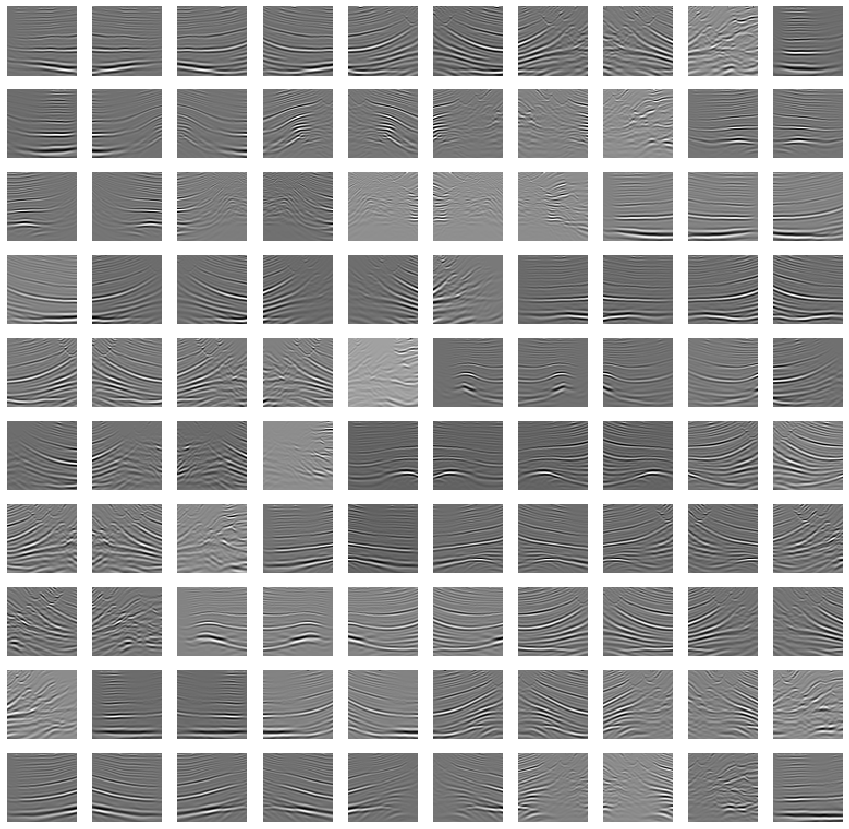

In [4]:
ut.plotGen(defocused,10)

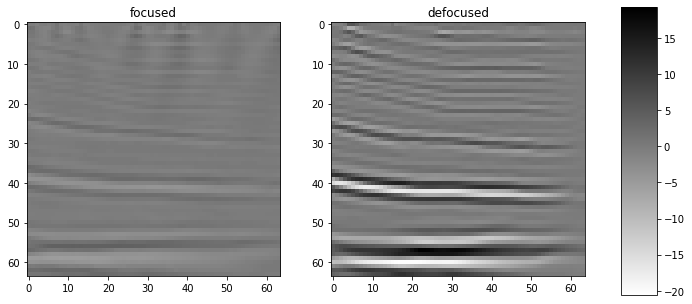

In [5]:
ut.plotInput(focused,defocused)

In [6]:
#consol
latent_dim = 100
n_batch = 128
n_epoch = 3

In [7]:
m = model.cGAN(focused.shape[1], focused.shape[2], focused.shape[3], latent_dim)
d_model = m.discriminator()
# create the generator
g_model = m.generator()
# create the gan
gan_model = m.combined(g_model, d_model)
gan_model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 4096)         413696      input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_3 (LeakyReLU)       (None, 4096)         0           dense_2[0][0]                    
____________________________________________________________________________________________

In [8]:
# train model
m.train(g_model, d_model, gan_model, focused, defocused, latent_dim, n_epoch, n_batch)

================== Epoch 1 ==================



C:\Users\kanfar\AppData\Local\Continuum\anaconda3\envs\Deep\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\kanfar\AppData\Local\Continuum\anaconda3\envs\Deep\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Completed: 7%


C:\Users\kanfar\AppData\Local\Continuum\anaconda3\envs\Deep\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


KeyboardInterrupt: 